In [12]:
import pandas as pd
import os

def confirm_columns(df, expected_columns):
    """
    Text confirmation of column presence in the dataset.
    
    Args:
        df (pd.DataFrame): DataFrame containing the dataset.
        expected_columns (list): List of expected column names.
    
    Returns:
        None
    """
    found_columns = [col for col in expected_columns if col in df.columns]
    missing_columns = [col for col in expected_columns if col not in df.columns]

    print("\n🔍 **Column Check Report** 🔍")
    print(f"\n✔️ Found Columns ({len(found_columns)}):")
    for col in found_columns:
        print(f"   - {col}")
    
    if missing_columns:
        print(f"\n❌ Missing Columns ({len(missing_columns)}):")
        for col in missing_columns:
            print(f"   - {col}")
    else:
        print("\n🎉 All expected columns are present!")

def load_and_clean_data(file_path, expected_columns):
    """
    Load and clean the dataset for CHO cell culture kinetics.
    - Confirms the presence of expected columns.
    - Removes spaces in column names.
    - Renames columns for clarity.
    - Cleans numerical data and converts to proper data types.
    - Converts 'Clone' column to categorical.
    
    Args:
        file_path (str): Path to the CSV file.
        expected_columns (list): List of expected column names.

    Returns:
        pd.DataFrame: A cleaned DataFrame ready for analysis.
    """
    df = pd.read_csv(file_path, skiprows=1)
    df.columns = df.columns.str.strip()
    confirm_columns(df, expected_columns)
    
    df.rename(columns={
        "T": "Time (days)",
        "G": "Glucose (g/L)",
        "Gln": "Glutamine (mmol/L)",
        "Xv": "Viable Cells (cells/mL)",
        "Xd": "Dead Cells (cells/mL)",
        "L": "Lactate (g/L)",
        "Glu": "Glutamate (mmol/L)",
        "V": "Viability (%)",
        "MAb": "Antibody Concentration (mg/mL)",
        "rP": "Recombinant Protein (mg/mL)",
        "rep": "Replicate"
    }, inplace=True)
    
    for column in df.columns:
        if column == "Clone":
            continue
        if df[column].dtype == object:
            df[column] = pd.to_numeric(df[column].str.replace('%', '', regex=False), errors='coerce')
        elif df[column].dtype in [int, float]:
            df[column] = pd.to_numeric(df[column], errors='coerce')
    
    if "Clone" in df.columns:
        df["Clone"] = df["Clone"].astype("category")
    
    return df

# Define the expected columns
expected_columns = [
    "Clone", "T", "G", "Gln", "Xv", "Xd", "L", "V", "MAb", "rP", "rep"
]

# Simplify the file path definition
dataset_path = 'data/2024-05-18_Clones_B_C_Kinetics.csv'

# Load and clean the dataset
kinetics_data = load_and_clean_data(dataset_path, expected_columns)

# Display the first few rows of the cleaned data
display(kinetics_data.head())

# Explore the DataFrame and display statistics
print("\n🔍 **DataFrame Overview** 🔍")
display(kinetics_data.describe())
print("\nDataFrame Info:")
display(kinetics_data.info())


🔍 **Column Check Report** 🔍

✔️ Found Columns (9):
   - Clone
   - T
   - G
   - Gln
   - Xv
   - L
   - V
   - MAb
   - rep

❌ Missing Columns (2):
   - Xd
   - rP


,Clone,Time (days),Viable Cells (cells/mL),Viability (%),Glucose (g/L),Lactate (g/L),Glutamine (mmol/L),Glutamate (mmol/L),Antibody Concentration (mg/mL),Replicate
0,B,0.0,284000.0,100.0,7.419121,0.004255,5.575516,1.821962,0.0,1
1,B,0.0,288000.0,100.0,7.515516,0.004507,5.572859,1.811074,0.0,2
2,B,0.0,278000.0,100.0,7.804288,0.004333,5.487487,1.702079,0.0,3
3,C,0.0,302000.0,100.0,8.031550,0.004320,5.988051,1.876903,0.0,1
4,C,0.0,298000.0,100.0,6.737842,0.003946,5.339700,1.918827,0.0,2



🔍 **DataFrame Overview** 🔍


,Time (days),Viable Cells (cells/mL),Viability (%),Glucose (g/L),Lactate (g/L),Glutamine (mmol/L),Glutamate (mmol/L),Antibody Concentration (mg/mL),Replicate
count,60.000000,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,3.920000,9.183950e+06,97.365048,4.720971,1.533619,3.014734,1.908255,0.045200,2.000000
std,2.244904,7.753946e+06,4.301089,1.959105,1.141990,1.942668,0.610009,0.056502,0.823387
min,0.000000,2.780000e+05,77.304964,1.159157,0.003946,0.720759,0.308746,0.000000,1.000000
25%,2.000000,1.535000e+06,97.583015,3.154693,0.774132,1.459361,1.697864,0.000000,1.000000
50%,4.500000,1.047000e+07,98.717949,4.426845,1.342337,2.023221,1.969579,0.020000,2.000000
75%,6.000000,1.620000e+07,99.334008,6.434299,2.305199,5.130244,2.328466,0.060000,3.000000
max,7.000000,2.150000e+07,100.000000,8.031550,5.010467,6.526645,2.772222,0.180000,3.000000



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Clone                           60 non-null     category
 1   Time (days)                     60 non-null     float64 
 2   Viable Cells (cells/mL)         60 non-null     float64 
 3   Viability (%)                   60 non-null     float64 
 4   Glucose (g/L)                   60 non-null     float64 
 5   Lactate (g/L)                   60 non-null     float64 
 6   Glutamine (mmol/L)              60 non-null     float64 
 7   Glutamate (mmol/L)              60 non-null     float64 
 8   Antibody Concentration (mg/mL)  60 non-null     float64 
 9   Replicate                       60 non-null     int64   
dtypes: category(1), float64(8), int64(1)
memory usage: 4.5 KB


None

In [ ]:
def handle_missing_values(df, strategy="mean"):
    """
    Handle missing values in the DataFrame to prevent issues in future calculations and visualizations.
    - Fills or removes missing values based on the selected strategy.

    Args:
        df (pd.DataFrame): The input DataFrame with possible missing values.
        strategy (str): Strategy to handle missing values. Options are:
                        - "mean": Fill missing values with the column mean (default).
                        - "median": Fill missing values with the column median.
                        - "zero": Fill missing values with 0.
                        - "drop": Drop rows with missing values.
    
    Returns:
        pd.DataFrame: A DataFrame with missing values handled.
    """
    if strategy == "mean":
        return df.fillna(df.mean(numeric_only=True))
    elif strategy == "median":
        return df.fillna(df.median(numeric_only=True))
    elif strategy == "zero":
        return df.fillna(0)
    elif strategy == "drop":
        return df.dropna()
    else:
        raise ValueError("Invalid strategy. Choose from 'mean', 'median', 'zero', or 'drop'.")

# Handle missing values in the DataFrame
kinetics_data = handle_missing_values(kinetics_data, strategy="mean")

# Explore the DataFrame and display statistics
print("\n🔍 **DataFrame Overview** 🔍")
display(kinetics_data.describe())
print("\nDataFrame Info:")
display(kinetics_data.info())


🔍 **DataFrame Overview** 🔍


,Time (days),Viable Cells (cells/mL),Viability (%),Glucose (g/L),Lactate (g/L),Glutamine (mmol/L),Glutamate (mmol/L),Antibody Concentration (mg/mL),Replicate
count,60.000000,6.000000e+01,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,3.920000,9.183950e+06,97.365048,4.720971,1.533619,3.014734,1.908255,0.045200,2.000000
std,2.244904,7.753946e+06,4.301089,1.959105,1.141990,1.942668,0.610009,0.056502,0.823387
min,0.000000,2.780000e+05,77.304964,1.159157,0.003946,0.720759,0.308746,0.000000,1.000000
25%,2.000000,1.535000e+06,97.583015,3.154693,0.774132,1.459361,1.697864,0.000000,1.000000
50%,4.500000,1.047000e+07,98.717949,4.426845,1.342337,2.023221,1.969579,0.020000,2.000000
75%,6.000000,1.620000e+07,99.334008,6.434299,2.305199,5.130244,2.328466,0.060000,3.000000
max,7.000000,2.150000e+07,100.000000,8.031550,5.010467,6.526645,2.772222,0.180000,3.000000



DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Clone                           60 non-null     category
 1   Time (days)                     60 non-null     float64 
 2   Viable Cells (cells/mL)         60 non-null     float64 
 3   Viability (%)                   60 non-null     float64 
 4   Glucose (g/L)                   60 non-null     float64 
 5   Lactate (g/L)                   60 non-null     float64 
 6   Glutamine (mmol/L)              60 non-null     float64 
 7   Glutamate (mmol/L)              60 non-null     float64 
 8   Antibody Concentration (mg/mL)  60 non-null     float64 
 9   Replicate                       60 non-null     int64   
dtypes: category(1), float64(8), int64(1)
memory usage: 4.5 KB


None

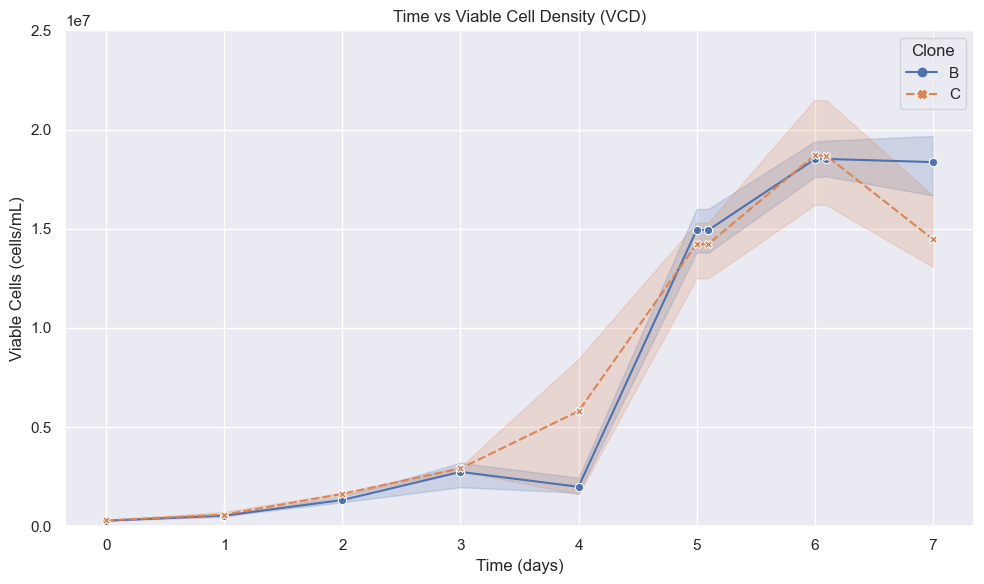

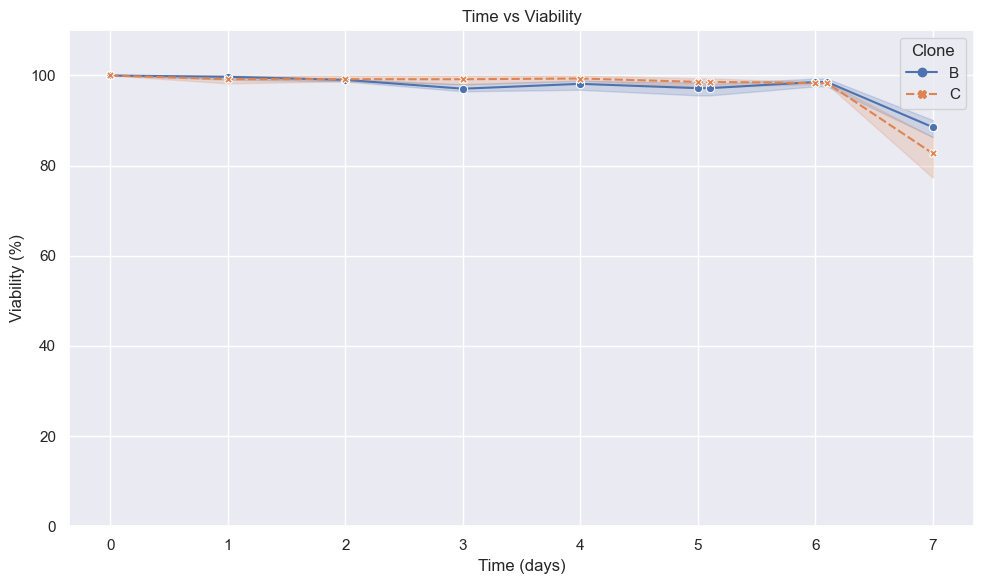

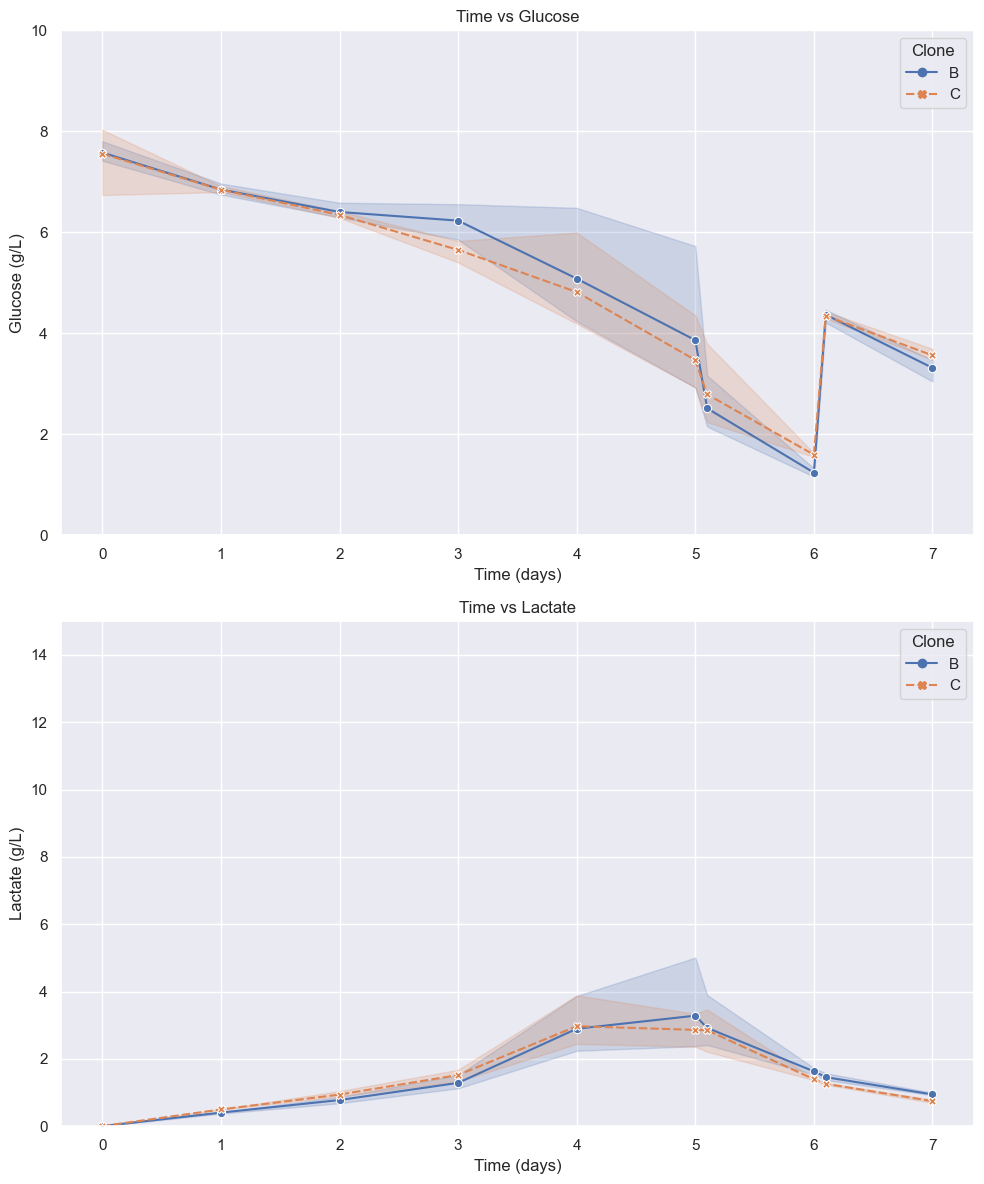

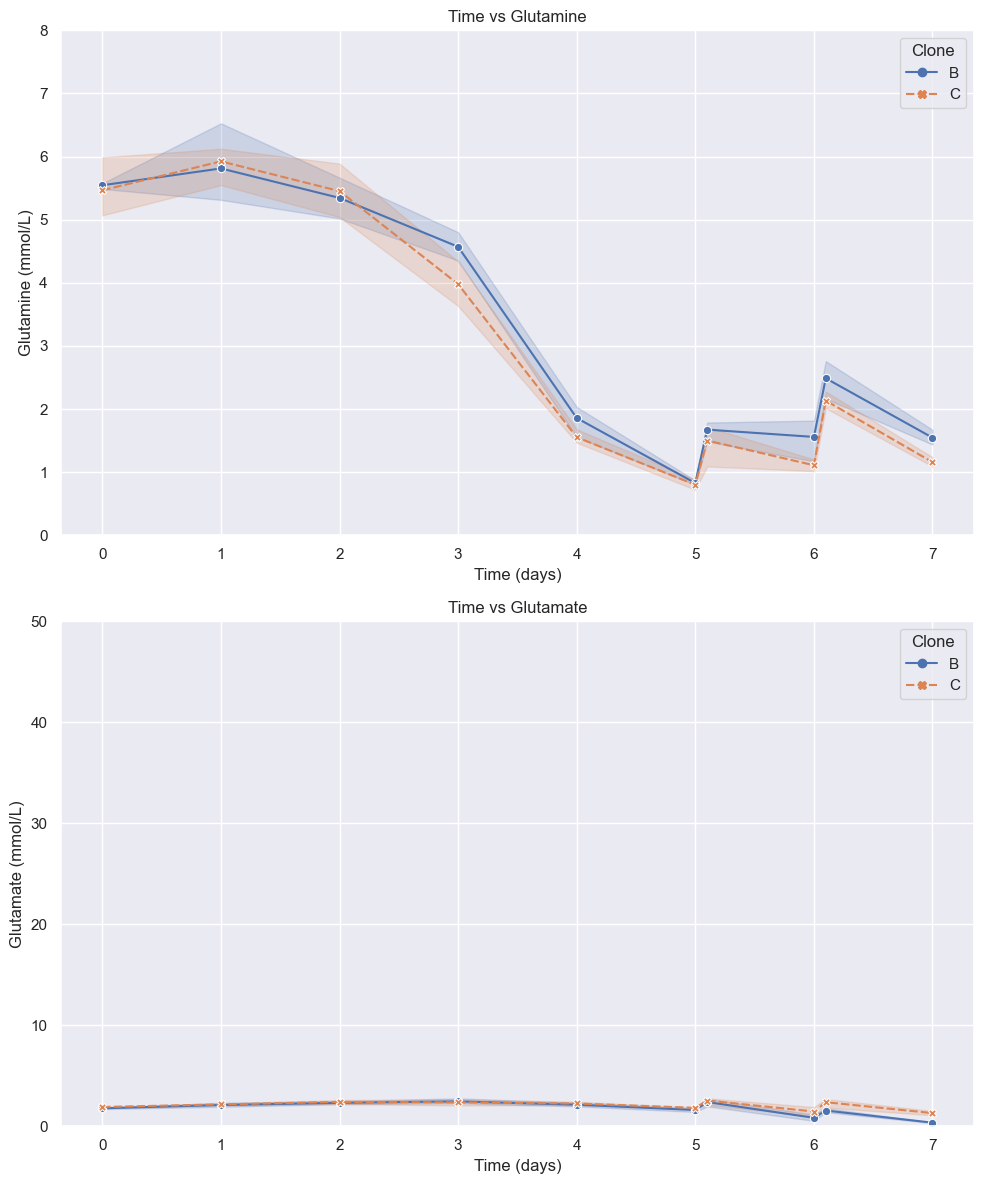

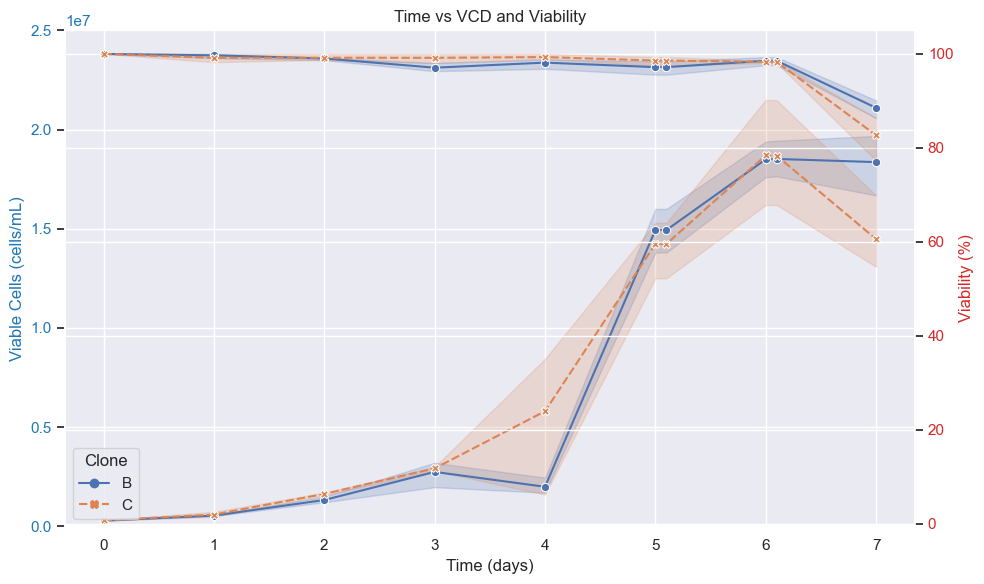

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configurar el tema del gráfico
sns.set_theme(style="darkgrid")

# Definir la ruta de salida para las gráficas
output_dir = 'figures'
os.makedirs(output_dir, exist_ok=True)

# Base del nombre del archivo
file_name = os.path.splitext(os.path.basename(dataset_path))[0]

# Función para graficar si la columna existe
def plot_if_column_exists(df, x, y, **kwargs):
    if y in df.columns:
        plt.figure(figsize=kwargs.get('figsize', (10, 6)))
        sns.lineplot(x=x, y=y, hue="Clone", style="Clone", markers=True, data=df)
        plt.xlabel(kwargs.get('xlabel', x))
        plt.ylabel(kwargs.get('ylabel', y))
        plt.title(kwargs.get('title', f"{y} vs {x}"))
        plt.ylim(kwargs.get('ylim', None))
        plt.grid(True)
        plt.legend(title="Clone")
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, kwargs.get('filename', f"{y}_vs_{x}_{file_name}.png")), format="png", dpi=300)
        plt.show()

# Gráfico: Tiempo vs VCD
plot_if_column_exists(kinetics_data, 
                      x="Time (days)", 
                      y="Viable Cells (cells/mL)", 
                      ylabel="Viable Cells (cells/mL)", 
                      title="Time vs Viable Cell Density (VCD)", 
                      ylim=(0, 25000000), 
                      filename=f"time_vs_vcd_{file_name}.png")

# Gráfico: Tiempo vs Viabilidad
plot_if_column_exists(kinetics_data, 
                      x="Time (days)", 
                      y="Viability (%)", 
                      ylabel="Viability (%)", 
                      title="Time vs Viability", 
                      ylim=(0, 110), 
                      filename=f"time_vs_viability_{file_name}.png")

# Subgráficos: Glucosa y Lactato vs Tiempo
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
if "Glucose (g/L)" in kinetics_data.columns:
    sns.lineplot(ax=axes[0], x="Time (days)", y="Glucose (g/L)", hue="Clone", style="Clone", markers=True, data=kinetics_data)
    axes[0].set_title("Time vs Glucose")
    axes[0].set_ylabel("Glucose (g/L)")
    axes[0].set_ylim(0, 10)
    axes[0].grid(True)
    axes[0].legend(title="Clone")

if "Lactate (g/L)" in kinetics_data.columns:
    sns.lineplot(ax=axes[1], x="Time (days)", y="Lactate (g/L)", hue="Clone", style="Clone", markers=True, data=kinetics_data)
    axes[1].set_title("Time vs Lactate")
    axes[1].set_ylabel("Lactate (g/L)")
    axes[1].set_ylim(0, 15)
    axes[1].grid(True)
    axes[1].legend(title="Clone")

fig.tight_layout()
fig.savefig(os.path.join(output_dir, f"time_vs_glucose_and_lactate_{file_name}.png"), format="png", dpi=300)
plt.show()

# Subgráficos: Glutamina y Glutamato vs Tiempo
fig, axes = plt.subplots(2, 1, figsize=(10, 12))
if "Glutamine (mmol/L)" in kinetics_data.columns:
    sns.lineplot(ax=axes[0], x="Time (days)", y="Glutamine (mmol/L)", hue="Clone", style="Clone", markers=True, data=kinetics_data)
    axes[0].set_title("Time vs Glutamine")
    axes[0].set_ylabel("Glutamine (mmol/L)")
    axes[0].set_ylim(0, 8)
    axes[0].grid(True)
    axes[0].legend(title="Clone")

if "Glutamate (mmol/L)" in kinetics_data.columns:
    sns.lineplot(ax=axes[1], x="Time (days)", y="Glutamate (mmol/L)", hue="Clone", style="Clone", markers=True, data=kinetics_data)
    axes[1].set_title("Time vs Glutamate")
    axes[1].set_ylabel("Glutamate (mmol/L)")
    axes[1].set_ylim(0, 50)
    axes[1].grid(True)
    axes[1].legend(title="Clone")

fig.tight_layout()
fig.savefig(os.path.join(output_dir, f"time_vs_glutamine_and_glutamate_{file_name}.png"), format="png", dpi=300)
plt.show()

# Gráfico con dos ejes Y: Tiempo vs VCD y Viabilidad
if "Viable Cells (cells/mL)" in kinetics_data.columns and "Viability (%)" in kinetics_data.columns:
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.set_xlabel("Time (days)")
    ax1.set_ylabel("Viable Cells (cells/mL)", color="tab:blue")
    sns.lineplot(ax=ax1, x="Time (days)", y="Viable Cells (cells/mL)", hue="Clone", style="Clone", markers=True, data=kinetics_data, legend=False)
    ax1.tick_params(axis="y", labelcolor="tab:blue")
    ax1.set_ylim(0, 25000000)

    ax2 = ax1.twinx()
    ax2.set_ylabel("Viability (%)", color="tab:red")
    sns.lineplot(ax=ax2, x="Time (days)", y="Viability (%)", hue="Clone", style="Clone", markers=True, data=kinetics_data)
    ax2.tick_params(axis="y", labelcolor="tab:red")
    ax2.set_ylim(-0.5, 105)

    plt.title("Time vs VCD and Viability")
    fig.tight_layout()
    plt.grid(True)
    fig.savefig(os.path.join(output_dir, f"time_vs_vcd_and_viability_{file_name}.png"), format="png", dpi=300)
    plt.show()
